<a href="https://colab.research.google.com/github/juanchoqueAM/Machine-learning/blob/main/IMPLEMENTA%C3%87%C3%83O%20EM%20PYTHON%20DO%20CLASSIFICADOR%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data.feature_names)
target = data.target

In [9]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = iris.pop ('target')

KeyError: 'target'

In [3]:
#Importando o algoritmo de SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svc = SVC(gamma="auto")

In [14]:
#Testando o modelo 'svc' na nossa base 'iris'
cv_result = cross_val_score(svc, iris, target, cv=10, scoring="accuracy")
#Retorna a acurácia em porcentagem do nosso modelo
print("Acurácia com cross validation:", cv_result.mean()*100)

Acurácia com cross validation: 98.00000000000001


In [5]:
svc.fit(iris, target)
#Prediz a que classe pertencerá a flor com sépala de comprimento 6.9cm e de largura 2.8cm e com pétala de comprimento 6.1cm e de largura 2.3cm
svc.predict([[6.9,2.8,6.1,2.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

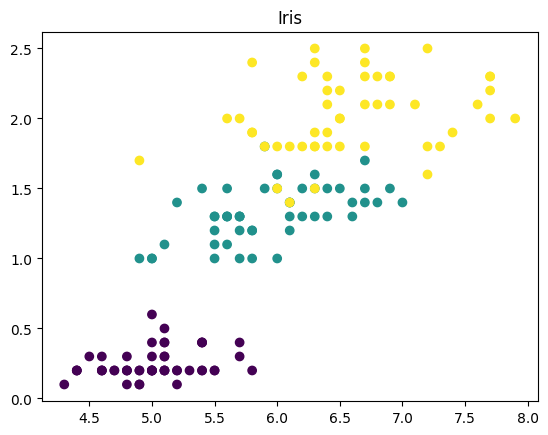

In [6]:
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target)
plt.title('Iris')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


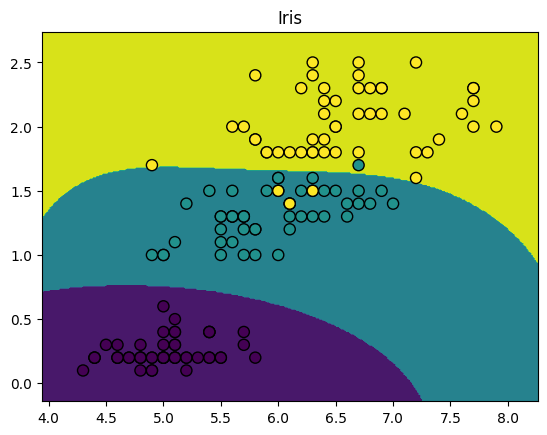

In [7]:

#Provavelmente criando duas features novas no iris o svm com 2 features terá mais sucesso, mas por enquanto usei só
#sepal length e petal width (os mais relevantes das 4 features já existentes)
x0_min, x0_max = iris['sepal length (cm)'].min(), iris['sepal length (cm)'].max()
x1_min, x1_max = iris['petal width (cm)'].min(), iris['petal width (cm)'].max()
w = x0_max - x0_min
h = x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min-.1*w, x0_max+.1*w, 300), np.linspace(x1_min-.1*h, x1_max+.1*h, 300))
svc.fit(iris[['sepal length (cm)', 'petal width (cm)']], target)
ypred = svc.predict(np.c_[x0.reshape(-1, 1), x1.reshape(-1, 1)])
ypred = ypred.reshape(x0.shape)
plt.contourf(x0, x1, ypred)
plt.scatter(iris['sepal length (cm)'], iris['petal width (cm)'], c=target, s=64, edgecolors='k')
plt.title('Iris')
plt.show()

Acurácia com cross validation: 98.00%
Predição para a amostra [6.9, 2.8, 6.1, 2.3]: Classe 2


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


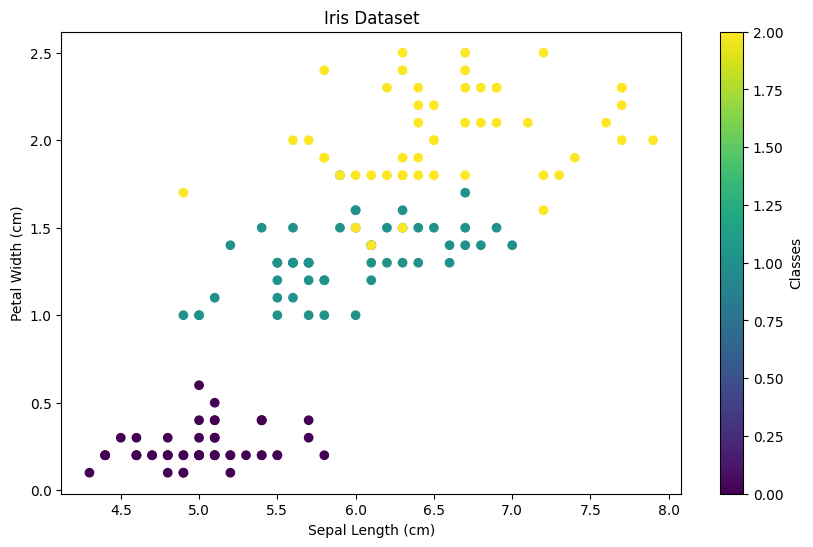

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


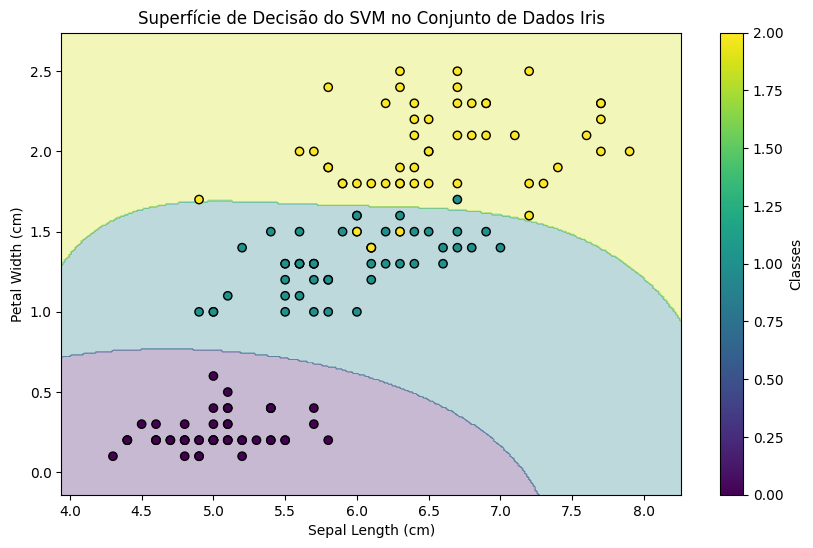

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Carregando o conjunto de dados Iris
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data['feature_names'])
iris['target'] = data['target']

# Separando as features e o target
X = iris.drop(columns='target')
y = iris['target']

# Instanciando o modelo SVM
svc = SVC(gamma="auto")

# Avaliando o modelo com cross-validation
cv_result = cross_val_score(svc, X, y, cv=10, scoring="accuracy")
print("Acurácia com cross validation: {:.2f}%".format(cv_result.mean() * 100))

# Treinando o modelo com todos os dados
svc.fit(X, y)

# Fazendo uma predição de exemplo
prediction = svc.predict([[6.9, 2.8, 6.1, 2.3]])
print("Predição para a amostra [6.9, 2.8, 6.1, 2.3]: Classe", prediction[0])

# Visualizando os dados
plt.figure(figsize=(10, 6))
plt.scatter(X['sepal length (cm)'], X['petal width (cm)'], c=y, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset')
plt.colorbar(label='Classes')
plt.show()

# Treinando o modelo com duas features mais relevantes
svc.fit(X[['sepal length (cm)', 'petal width (cm)']], y)

# Criando uma malha de pontos para visualizar a decisão do modelo
x0_min, x0_max = X['sepal length (cm)'].min(), X['sepal length (cm)'].max()
x1_min, x1_max = X['petal width (cm)'].min(), X['petal width (cm)'].max()
w, h = x0_max - x0_min, x1_max - x1_min
x0, x1 = np.meshgrid(np.linspace(x0_min - 0.1 * w, x0_max + 0.1 * w, 300),
                     np.linspace(x1_min - 0.1 * h, x1_max + 0.1 * h, 300))

# Predizendo as classes para cada ponto na malha
ypred = svc.predict(np.c_[x0.ravel(), x1.ravel()])
ypred = ypred.reshape(x0.shape)

# Visualizando a superfície de decisão
plt.figure(figsize=(10, 6))
plt.contourf(x0, x1, ypred, alpha=0.3, cmap='viridis')
plt.scatter(X['sepal length (cm)'], X['petal width (cm)'], c=y, edgecolors='k', cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Superfície de Decisão do SVM no Conjunto de Dados Iris')
plt.colorbar(label='Classes')
plt.show()


<div class="markdown-google-sans">
  <h1>Conheça o Colab</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;Novidade&#41; Teste a API Gemini</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


Se você já conhece bem o Colab, confira este vídeo para saber mais sobre as tabelas interativas, a visualização do histórico de código executado e o Palette de comandos.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  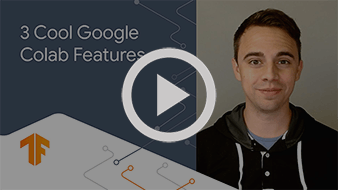
  </a>
</center>

<div class="markdown-google-sans">
  <h2>O que é o Colab?</h2>
</div>

O Colab, ou "Colaboratory", permite escrever e executar Python no navegador e conta com o seguinte:
- Nenhuma configuração necessária
- Acesso a GPUs sem custo financeiro
- Compartilhamento fácil

Você pode ser um <strong>estudante</strong>, um <strong>cientista de dados</strong> ou um <strong>pesquisador de IA</strong>, o Colab pode facilitar seu trabalho. Assista ao vídeo <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introdução ao Colab</a> para saber mais ou simplesmente comece a usá-lo abaixo!